In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/jr0th/github/segmentation/code/')

import skimage.io
import skimage.morphology
import skimage.segmentation

import sklearn.metrics

import os.path
import os

import numpy as np

import time

debug = True

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
tag = "DL_on_Hand_boundary_augment"

mo_data_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/' + tag + '/segm/'
mat_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/' + tag + '/IoU/'
err_img_out_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/' + tag + '/error_img/'

In [3]:
gt_data_dir = '/home/jr0th/github/segmentation/experiments/GT_segmentations/'
path_files_test = '/home/jr0th/github/segmentation/data/BBBC022/test.txt'

In [4]:
with open(path_files_test) as f:
    test_files = f.read().splitlines()

In [5]:
def visualize(mat, seg_gt, seg_model):

    # get number of nuclei
    nb_nuc_gt = mat.shape[0]
    nb_nuc_model = mat.shape[1]
    
    if debug:
        print('# nuclei ground truth', nb_nuc_gt)
        print('# nuclei model', nb_nuc_model)
    
    # only allow assignments if IoU is at least 0.5
    detection_map = (mat > 0.5)
    nb_matches = np.sum(detection_map)
    detection_map_gt = np.sum(detection_map, 1)
    detection_map_model = np.sum(detection_map, 0)
    
    # mask with matches
    detection_rate = mat * detection_map
    
    nb_overdetection = nb_nuc_model - nb_matches
    nb_underdetection = nb_nuc_gt - nb_matches
    
    if debug:
        print('# matches', nb_matches)
        print('# overdetections', nb_overdetection)
        print('# underdetections', nb_underdetection)
        
    mean_IoU = np.mean(np.sum(detection_rate, axis = 1))
    
    if debug:
        print('# mean IoU', mean_IoU)
    
    # plot masked matrix
    plt.figure(figsize=(10,10))
    plt.matshow(detection_rate)
    plt.show()
    
    # get indices of mislabeled cells
    error_underdetected = np.nonzero(detection_map_gt == 0)[0] + 1
    error_overdetected = np.nonzero(detection_map_model == 0)[0] + 1

    # get empty buffer image
    error_img = np.zeros((seg_model.shape[0], seg_model.shape[1], 3), dtype = np.ubyte)

    # color image
    brownish = [172, 128, 0]
    blueish = [31, 190, 214]
    for error in error_underdetected:
        # brownish: underdetected
        error_img[seg_gt == error, :] = brownish
    for error in error_overdetected:
        # blueish: overdetected
        error_img[seg_model == error, :] = error_img[seg_model == error, :] + blueish
        
    # pixels where under- and overdetection occured appear in pink
    
    return error_img

    

# nuclei ground truth 51
# nuclei model 51
# matches 51
# overdetections 0
# underdetections 0
# mean IoU 0.75237


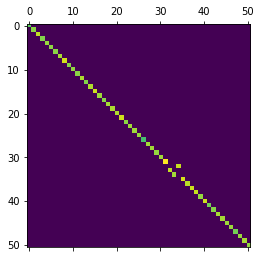

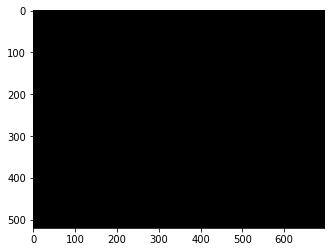

# nuclei ground truth 84
# nuclei model 82
# matches 82
# overdetections 0
# underdetections 2
# mean IoU 0.744852


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_P21_s4_w19B7DC88B-10BB-4B51-9A10-9E30285688C1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


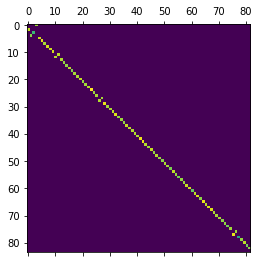

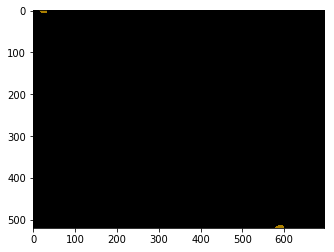

# nuclei ground truth 77
# nuclei model 65
# matches 63
# overdetections 2
# underdetections 14
# mean IoU 0.550978


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_P19_s6_w10EBAD15B-2822-48B9-B9C8-4DF5D80AB940.png is a low contrast image
  warn('%s is a low contrast image' % fname)


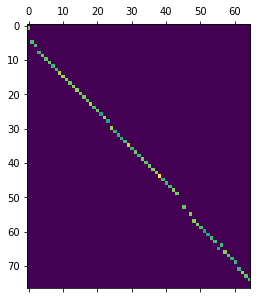

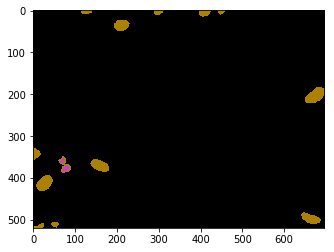

# nuclei ground truth 97
# nuclei model 90
# matches 90
# overdetections 0
# underdetections 7
# mean IoU 0.709508


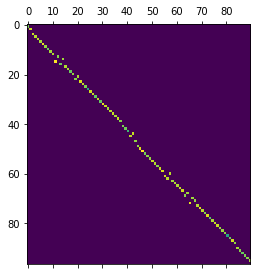

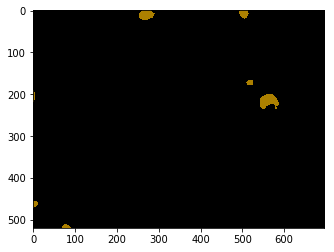

# nuclei ground truth 44
# nuclei model 42
# matches 42
# overdetections 0
# underdetections 2
# mean IoU 0.73151


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_P07_s8_w144364F25-950A-472C-A529-1A9AD0433B6C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


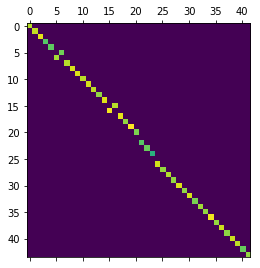

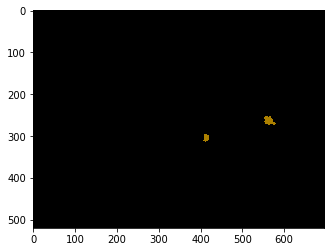

# nuclei ground truth 87
# nuclei model 87
# matches 87
# overdetections 0
# underdetections 0
# mean IoU 0.752291


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_P07_s8_w19D682C29-5685-4A33-8CAA-F0797DD7F021.png is a low contrast image
  warn('%s is a low contrast image' % fname)


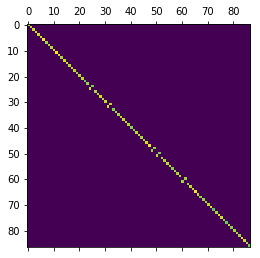

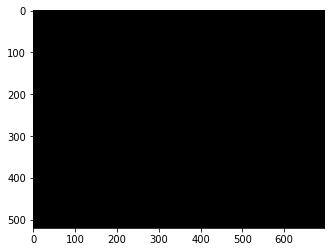

# nuclei ground truth 69
# nuclei model 66
# matches 65
# overdetections 1
# underdetections 4
# mean IoU 0.721269


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_O04_s2_w19A18B0D8-8E8B-4572-A5C0-5C678F3AD54C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


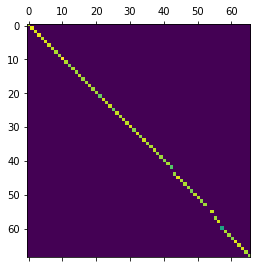

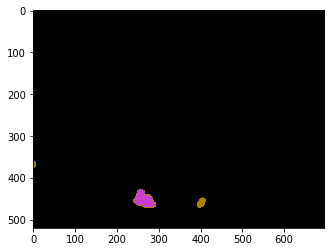

# nuclei ground truth 74
# nuclei model 72
# matches 72
# overdetections 0
# underdetections 2
# mean IoU 0.710684


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_O02_s4_w1814603DA-DD56-44EF-98C5-AFF3B636F986.png is a low contrast image
  warn('%s is a low contrast image' % fname)


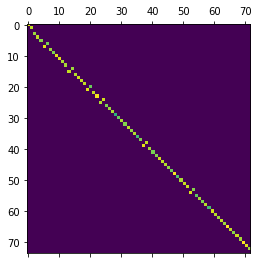

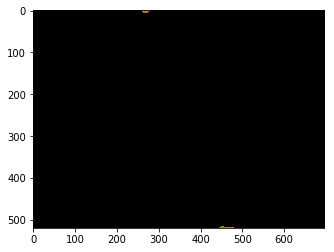

# nuclei ground truth 25
# nuclei model 23
# matches 23
# overdetections 0
# underdetections 2
# mean IoU 0.634536


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_O01_s6_w11A23978B-BAAD-4287-B1F6-FFBCF45C5E2F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


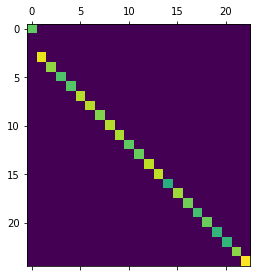

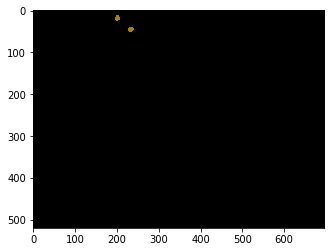

# nuclei ground truth 138
# nuclei model 129
# matches 129
# overdetections 0
# underdetections 9
# mean IoU 0.705339


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_N21_s1_w14F264B20-62D6-47EC-9BCD-B9416AB302D9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


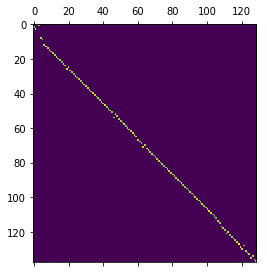

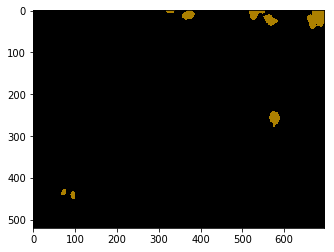

# nuclei ground truth 84
# nuclei model 82
# matches 80
# overdetections 2
# underdetections 4
# mean IoU 0.712096


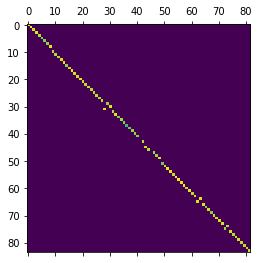

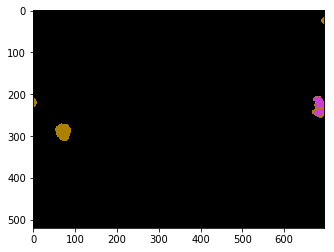

/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_N11_s4_w142A84EA3-47C3-4B49-B6CA-BBC6685BBE1E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


# nuclei ground truth 113
# nuclei model 108
# matches 105
# overdetections 3
# underdetections 8
# mean IoU 0.697484


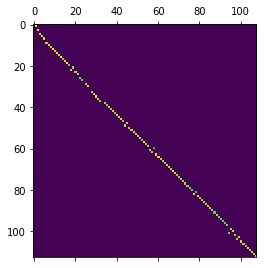

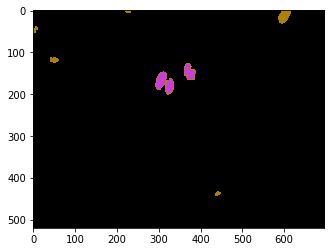

# nuclei ground truth 142
# nuclei model 142
# matches 140
# overdetections 2
# underdetections 2
# mean IoU 0.737661


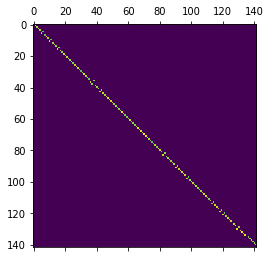

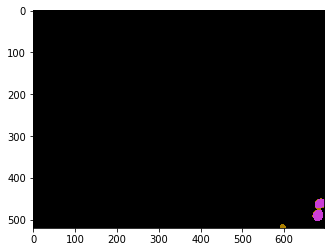

# nuclei ground truth 184
# nuclei model 173
# matches 161
# overdetections 12
# underdetections 23
# mean IoU 0.663001


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_N07_s5_w1D30ED7AB-503E-479D-B5BC-B66472568DE2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


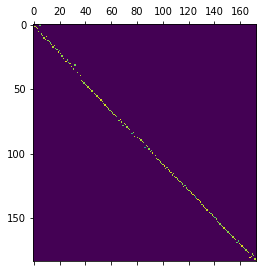

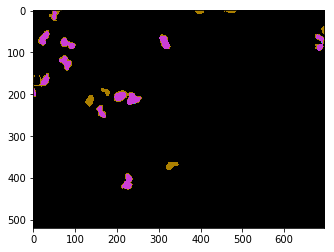

# nuclei ground truth 179
# nuclei model 159
# matches 157
# overdetections 2
# underdetections 22
# mean IoU 0.649942


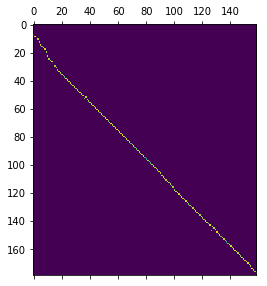

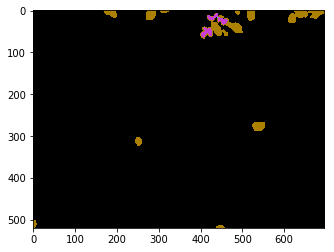

# nuclei ground truth 141
# nuclei model 129
# matches 129
# overdetections 0
# underdetections 12
# mean IoU 0.676465


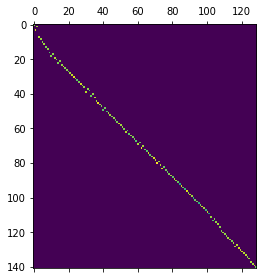

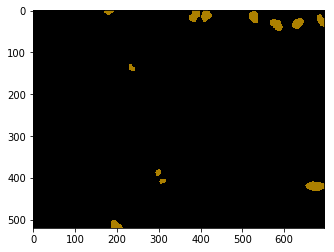

# nuclei ground truth 132
# nuclei model 125
# matches 124
# overdetections 1
# underdetections 8
# mean IoU 0.713513


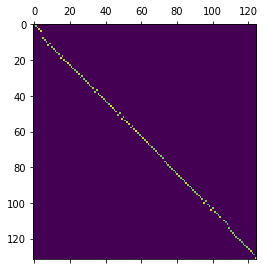

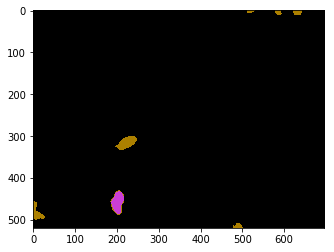

# nuclei ground truth 128
# nuclei model 124
# matches 123
# overdetections 1
# underdetections 5
# mean IoU 0.72502


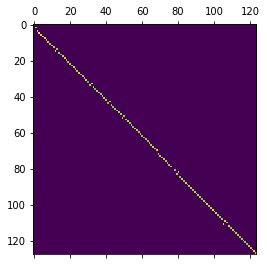

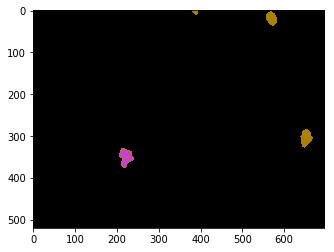

# nuclei ground truth 105
# nuclei model 92
# matches 87
# overdetections 5
# underdetections 18
# mean IoU 0.620438


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_K03_s5_w1DC4CE558-042C-482E-8CAE-FCCB57AA9A55.png is a low contrast image
  warn('%s is a low contrast image' % fname)


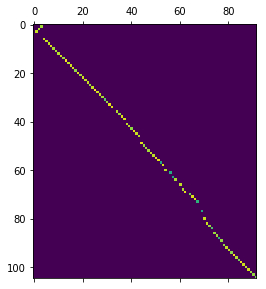

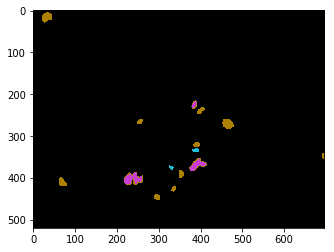

# nuclei ground truth 95
# nuclei model 95
# matches 95
# overdetections 0
# underdetections 0
# mean IoU 0.768001


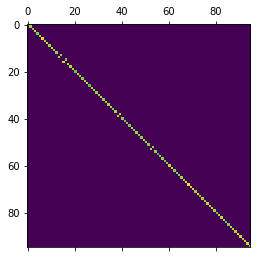

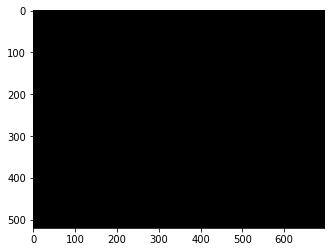

# nuclei ground truth 76
# nuclei model 71
# matches 69
# overdetections 2
# underdetections 7
# mean IoU 0.642933


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_K01_s3_w1054711D8-52CF-4672-B3A0-EC9EC2E681C4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


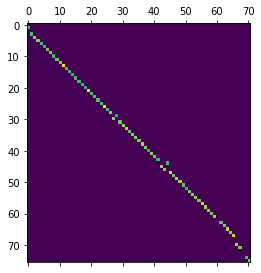

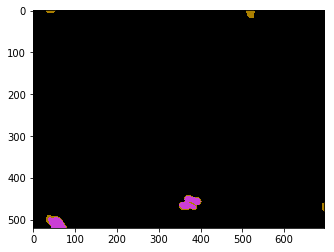

# nuclei ground truth 136
# nuclei model 134
# matches 130
# overdetections 4
# underdetections 6
# mean IoU 0.711295


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_J17_s1_w19E7BCD2F-6D7E-4B39-9154-F93E4D539183.png is a low contrast image
  warn('%s is a low contrast image' % fname)


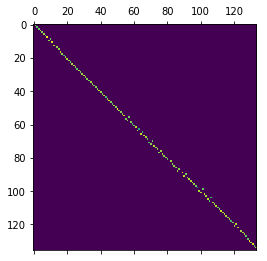

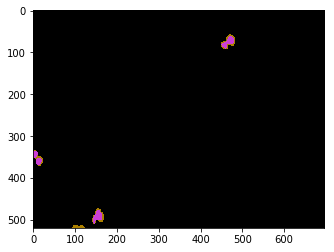

# nuclei ground truth 34
# nuclei model 33
# matches 33
# overdetections 0
# underdetections 1
# mean IoU 0.705808


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_J16_s8_w1AD7BC3EB-6A29-4A53-AA59-E39653839B0D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


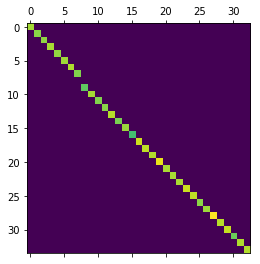

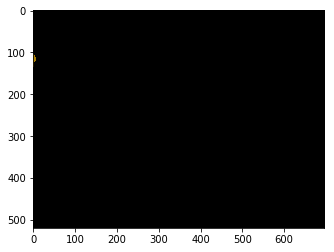

# nuclei ground truth 124
# nuclei model 115
# matches 114
# overdetections 1
# underdetections 10
# mean IoU 0.66541


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_I23_s5_w1E3053D6B-8CEF-48E3-A6A5-2F0D7C1AA177.png is a low contrast image
  warn('%s is a low contrast image' % fname)


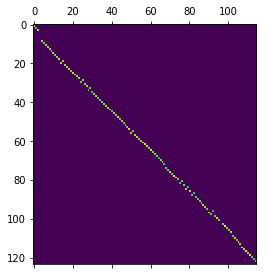

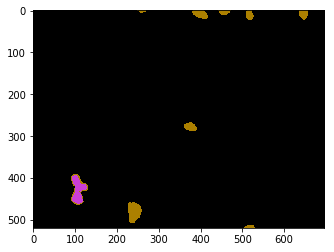

# nuclei ground truth 138
# nuclei model 126
# matches 125
# overdetections 1
# underdetections 13
# mean IoU 0.658604


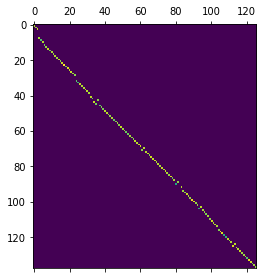

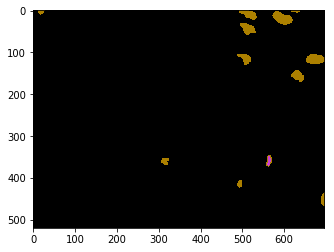

# nuclei ground truth 197
# nuclei model 188
# matches 185
# overdetections 3
# underdetections 12
# mean IoU 0.69826


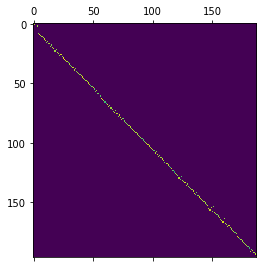

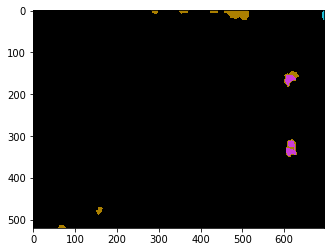

# nuclei ground truth 126
# nuclei model 115
# matches 112
# overdetections 3
# underdetections 14
# mean IoU 0.677946


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_I12_s1_w18A06F07F-CD8F-4056-B041-3967BE48AD78.png is a low contrast image
  warn('%s is a low contrast image' % fname)


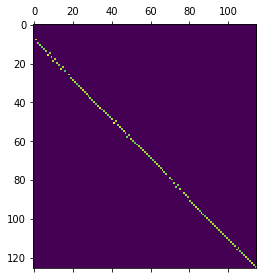

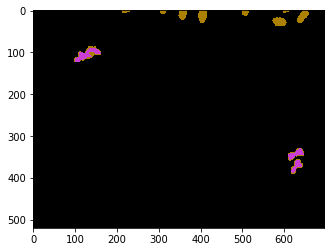

# nuclei ground truth 117
# nuclei model 111
# matches 108
# overdetections 3
# underdetections 9
# mean IoU 0.691742


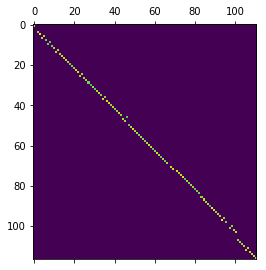

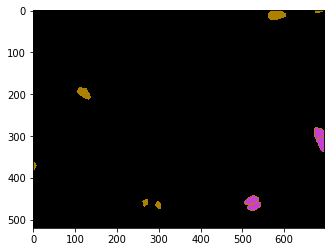

# nuclei ground truth 79
# nuclei model 76
# matches 76
# overdetections 0
# underdetections 3
# mean IoU 0.712798


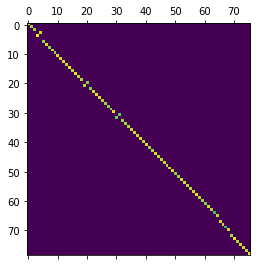

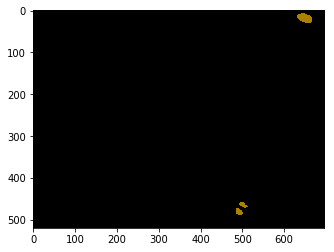

# nuclei ground truth 112
# nuclei model 109
# matches 106
# overdetections 3
# underdetections 6
# mean IoU 0.7188


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_G01_s2_w1FBE52723-8BDF-4346-89BB-216A4A69ED1C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


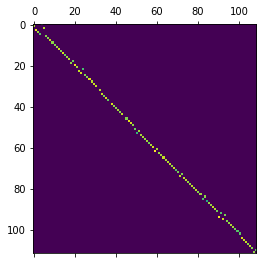

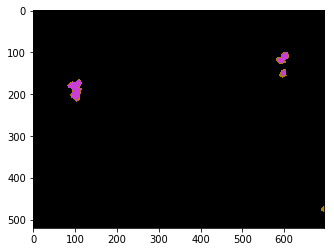

# nuclei ground truth 7
# nuclei model 7
# matches 7
# overdetections 0
# underdetections 0
# mean IoU 0.695975


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_F14_s7_w1E67F2A8A-EEC1-4F01-A1E2-0ECFC639637F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


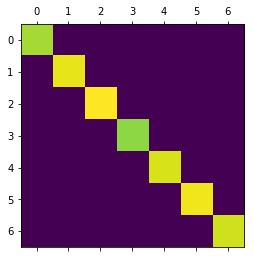

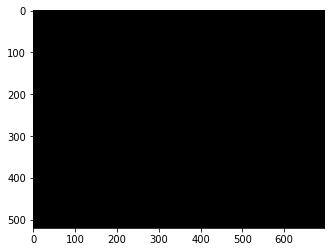

# nuclei ground truth 58
# nuclei model 55
# matches 55
# overdetections 0
# underdetections 3
# mean IoU 0.702097


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_F12_s8_w1DBD80811-5297-4415-ACD1-EC9286BE76A4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


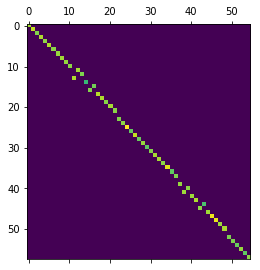

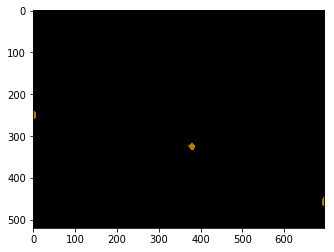

# nuclei ground truth 101
# nuclei model 99
# matches 99
# overdetections 0
# underdetections 2
# mean IoU 0.736466


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_F08_s7_w117D78658-1BA7-495D-9EAA-E4FA155861AC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


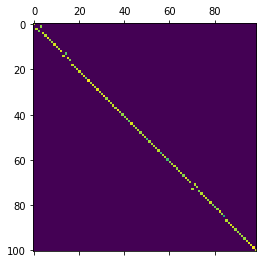

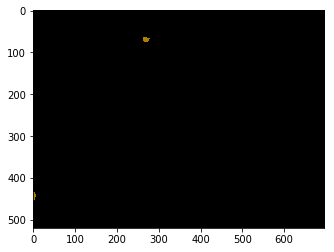

# nuclei ground truth 131
# nuclei model 127
# matches 124
# overdetections 3
# underdetections 7
# mean IoU 0.725072


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_F04_s5_w1D94DA1A2-873C-44B3-80EB-36DC2A97E9A3.png is a low contrast image
  warn('%s is a low contrast image' % fname)


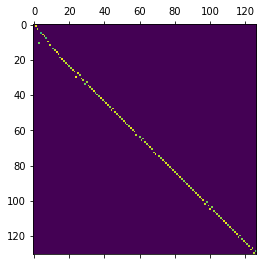

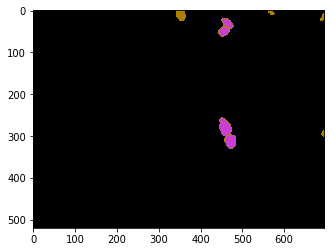

# nuclei ground truth 152
# nuclei model 146
# matches 145
# overdetections 1
# underdetections 7
# mean IoU 0.723122


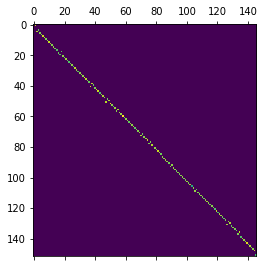

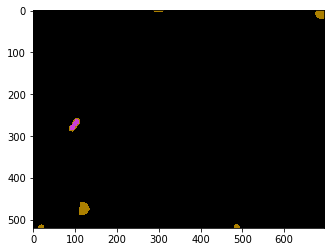

# nuclei ground truth 160
# nuclei model 157
# matches 157
# overdetections 0
# underdetections 3
# mean IoU 0.746584


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_E07_s1_w1641C6847-142B-463F-8B08-5B3296615572.png is a low contrast image
  warn('%s is a low contrast image' % fname)


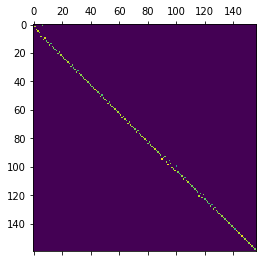

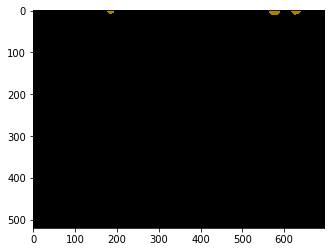

# nuclei ground truth 134
# nuclei model 128
# matches 126
# overdetections 2
# underdetections 8
# mean IoU 0.705116


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_D20_s3_w19D371AF3-0189-48A3-AF3B-D108DE6A017F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


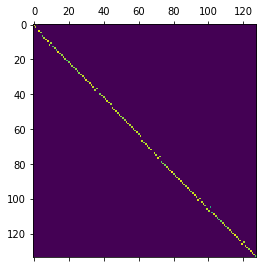

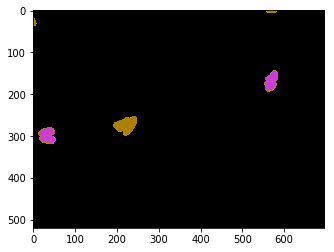

# nuclei ground truth 35
# nuclei model 32
# matches 28
# overdetections 4
# underdetections 7
# mean IoU 0.594631


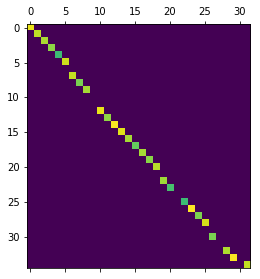

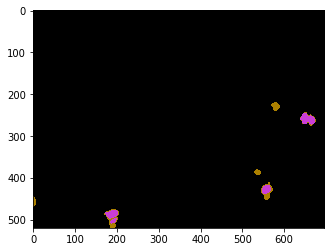

# nuclei ground truth 151
# nuclei model 146
# matches 146
# overdetections 0
# underdetections 5
# mean IoU 0.70976


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_D08_s7_w1F476A544-A07C-4E9B-A6CB-BAEF4CD6F64E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


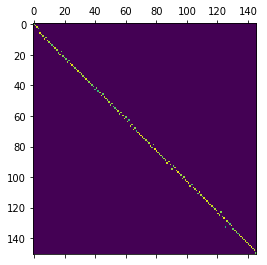

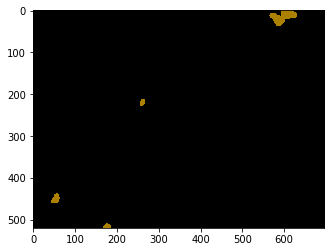

# nuclei ground truth 95
# nuclei model 92
# matches 89
# overdetections 3
# underdetections 6
# mean IoU 0.671651


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_D06_s8_w1BE84C8EF-4CD0-4B56-8267-4E662F57AC25.png is a low contrast image
  warn('%s is a low contrast image' % fname)


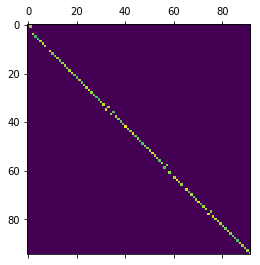

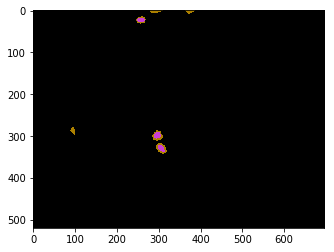

# nuclei ground truth 109
# nuclei model 100
# matches 98
# overdetections 2
# underdetections 11
# mean IoU 0.685903


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_D01_s1_w181AE787C-B5EE-4150-A90E-2FE43165C32E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


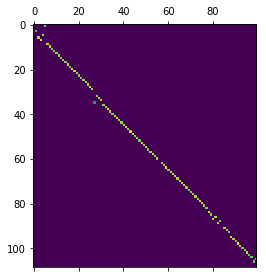

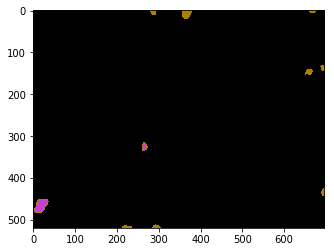

# nuclei ground truth 124
# nuclei model 119
# matches 118
# overdetections 1
# underdetections 6
# mean IoU 0.732257


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_C23_s2_w10533E965-3DC3-4556-9C26-EA8DD4F8DE61.png is a low contrast image
  warn('%s is a low contrast image' % fname)


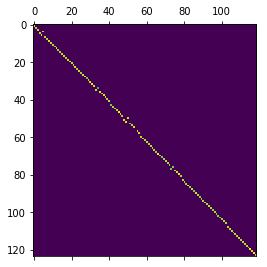

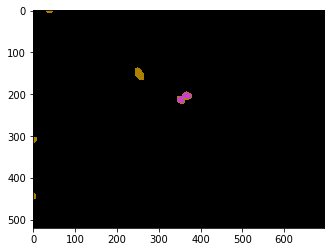

# nuclei ground truth 145
# nuclei model 142
# matches 142
# overdetections 0
# underdetections 3
# mean IoU 0.717594


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_C14_s8_w1612E3D43-FA7E-4FFB-BE53-F34A3A0CAFCD.png is a low contrast image
  warn('%s is a low contrast image' % fname)


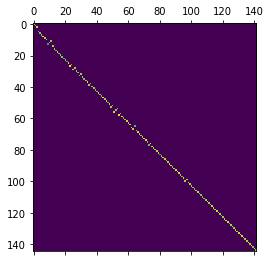

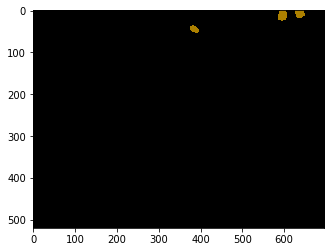

# nuclei ground truth 108
# nuclei model 104
# matches 103
# overdetections 1
# underdetections 5
# mean IoU 0.738216


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_C07_s5_w12C9F2926-A017-4962-8660-72C9C20C86E4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


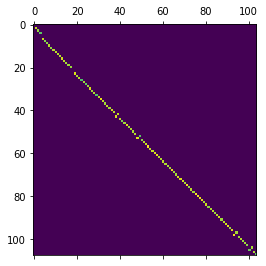

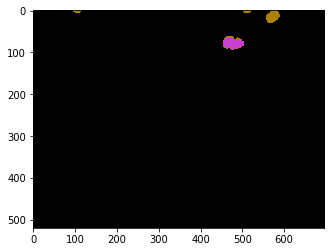

# nuclei ground truth 109
# nuclei model 107
# matches 106
# overdetections 1
# underdetections 3
# mean IoU 0.716131


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_B05_s5_w10296BEF4-0F48-4EC8-BC24-6C604871398B.png is a low contrast image
  warn('%s is a low contrast image' % fname)


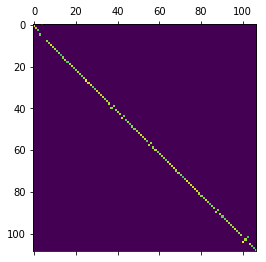

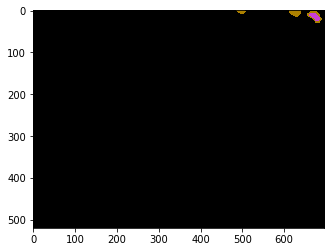

# nuclei ground truth 61
# nuclei model 59
# matches 59
# overdetections 0
# underdetections 2
# mean IoU 0.744025


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_B04_s2_w17C6C7F8D-98F7-422B-92CD-EA61EE813325.png is a low contrast image
  warn('%s is a low contrast image' % fname)


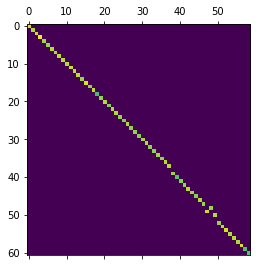

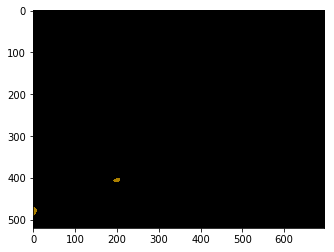

# nuclei ground truth 88
# nuclei model 83
# matches 81
# overdetections 2
# underdetections 7
# mean IoU 0.684334


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_B02_s9_w124B5080D-EBE1-47D2-B147-C0F342039EDF.png is a low contrast image
  warn('%s is a low contrast image' % fname)


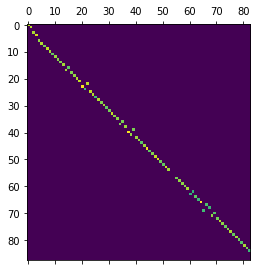

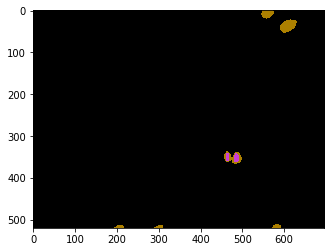

# nuclei ground truth 86
# nuclei model 85
# matches 85
# overdetections 0
# underdetections 1
# mean IoU 0.746891


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_A22_s8_w1E2AFE190-831D-4D9C-961E-3AA2ECB3599D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


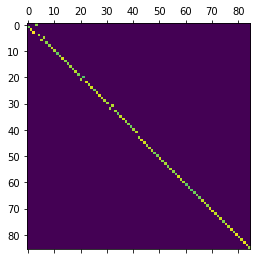

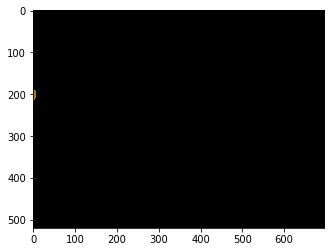

# nuclei ground truth 19
# nuclei model 16
# matches 15
# overdetections 1
# underdetections 4
# mean IoU 0.58404


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_A16_s2_w15AF20A10-82AE-48FA-AC50-7AE8AC3AA544.png is a low contrast image
  warn('%s is a low contrast image' % fname)


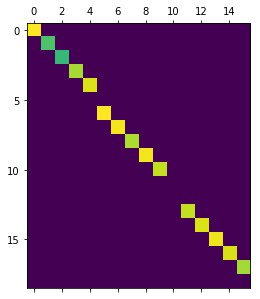

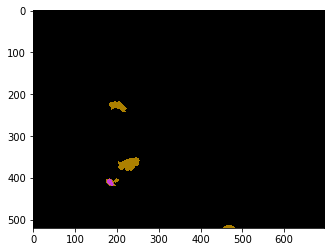

# nuclei ground truth 149
# nuclei model 144
# matches 140
# overdetections 4
# underdetections 9
# mean IoU 0.676262


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary_augment/DL_on_Hand_boundary_augment/error_img/IXMtest_A12_s7_w1EAEEA614-51ED-43B3-A4FF-088730911E4C.png is a low contrast image
  warn('%s is a low contrast image' % fname)


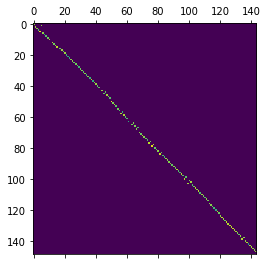

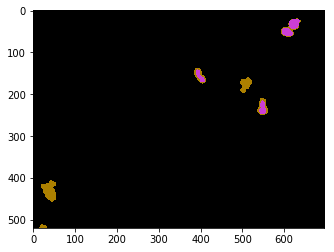

In [6]:
for filename in test_files:
    
    filename_wo_ext = os.path.splitext(filename)[0]
    
    # load error matrices
    IoU = np.load(mat_dir + filename_wo_ext + '.npy')

    # load segmentations
    seg_gt = skimage.io.imread(gt_data_dir + filename)
    seg_mo = skimage.io.imread(mo_data_dir + filename)
    
    # visualize only if matrices are full (no empty images and some detection)
    if(IoU.size != 0):
        error_img = visualize(IoU, seg_gt, seg_mo)
        plt.imshow(error_img)
        plt.show()
        skimage.io.imsave(err_img_out_dir + filename, error_img)
        